In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


from drive.MyDrive.Proyecto.funciones import parser as ps

In [2]:
df = ps.branch_data_df('/content/drive/MyDrive/Proyecto/Datos/prueba_sin_sobrecargas.raw')
df

,I,J,R,X,B
0,'ACO150_B 150.00','PBE150BX 150.00',0.002933,0.009957,0.00376
1,'ACO150_B 150.00','PBE150RX 150.00',0.002933,0.009957,0.00376
2,'ARA150_B 150.00','CLFAUX150_B 150.00',0.015066,0.045404,0.01581
3,'ARA150_B 150.00','TGO150_B 150.00',0.033038,0.099566,0.03467
4,'ARB150P1 150.00','ARB150_B 150.00',0.000920,0.003720,0.00123
...,...,...,...,...,...
138,'SCA150_B 150.00','SCAROC_X 150.00',0.003609,0.013645,0.00517
139,'SGDE.ARG 500.00','SU5500_B 500.00',0.000040,0.000410,0.03890
140,'SJ5500_B 500.00','SU5500_B 500.00',0.001710,0.016060,1.52925
141,'TAB150_B 150.00','TAC150_B 150.00',0.007609,0.022935,0.00797


In [3]:
def get_Admittances(branch_df):
  Admitance = np.empty((branch_df.shape[0],2),dtype = 'complex_')
  Admitance[:,0] = 1/(branch_df['R']+branch_df['X']*1j)
  Admitance[:,1] = branch_df['B']/2*1j
  Admitance = pd.DataFrame(Admitance,columns=['y','ysh'])

  Admitance['I'] = branch_df['I']
  Admitance['J'] = branch_df['J']
  Admitance = Admitance[['I','J','y','ysh']]
  return Admitance

def get_graph(edges_df):
  new_rows = []
  for _, row in edges_df.iterrows():
      source, sink, _, self_loop_weight = row
      new_rows.append({'source': source, 'target': source, 'weight': self_loop_weight})
      new_rows.append({'source': sink, 'target': sink, 'weight': self_loop_weight})
  new_edges_df = edges_df.drop(columns=['ysh'])
  new_edges_df.rename(columns={'I': 'source', 'J': 'target','y': 'weight'}, inplace=True)
  new_edges_df = new_edges_df.append(new_rows, ignore_index=True)
  new_edges_df_2 = new_edges_df.groupby(['source', 'target'])['weight'].sum().reset_index()
  G = nx.from_pandas_edgelist(new_edges_df_2, edge_attr=True)
  return G

def get_Ybus(G):
  Y = nx.laplacian_matrix(G).toarray()
  for i, node in enumerate(G.nodes()):
      degree = G.degree(node,weight='weight')
      Y[i, i] += (degree - Y[i, i])  / 2
  return Y

<ipython-input-3-de866ea69931>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_edges_df = new_edges_df.append(new_rows, ignore_index=True)


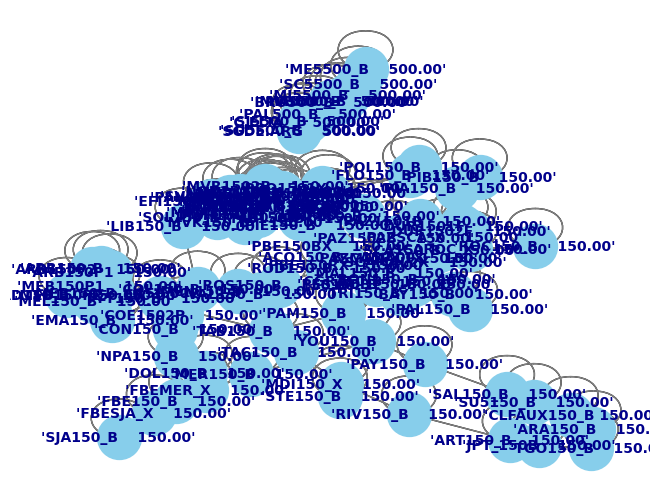

In [4]:
Admitance = get_Admittances(df)
G = get_graph(Admitance)
Ybus = get_Ybus(G)

for edge in G.edges():
    weight_complex = G.edges[edge]['weight']
    weight_magnitude = abs(weight_complex)
    G.edges[edge]['weight'] = weight_magnitude

# Definir el layout y visualizar los nodos
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='darkblue', font_weight='bold')

# Dibujar los enlaces con colores y grosores basados en los valores transformados
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Agregar anotaciones o leyendas si es necesario

# Mostrar la visualización
plt.show()


In [19]:
list(G.nodes)

["'ACO150_B    150.00'",
 "'PBE150BX    150.00'",
 "'PBE150RX    150.00'",
 "'ARA150_B    150.00'",
 "'CLFAUX150_B 150.00'",
 "'TGO150_B    150.00'",
 "'ARB150P1    150.00'",
 "'ARB150_B    150.00'",
 "'TYT150_B    150.00'",
 "'ARB150P2    150.00'",
 "'MEB150P1    150.00'",
 "'ART150_B    150.00'",
 "'JPT_150B    150.00'",
 "'RIV150_B    150.00'",
 "'BAY150_B    150.00'",
 "'BON150_B    150.00'",
 "'PAL150_B    150.00'",
 "'TRI150_B    150.00'",
 "'BIF150_B    150.00'",
 "'MVA150_B    150.00'",
 "'PAN150_F    150.00'",
 "'PAZ1501B    150.00'",
 "'PAZ1502B    150.00'",
 "'BOB150_B    150.00'",
 "'YOU150_B    150.00'",
 "'DUR1501F    150.00'",
 "'DUR1502F    150.00'",
 "'PAM150_B    150.00'",
 "'VAL150_B    150.00'",
 "'BRU500_B    500.00'",
 "'MVB500_B    500.00'",
 "'PAL500_B    500.00'",
 "'C.ELIA      500.00'",
 "'SGDE.ARG    500.00'",
 "'SJ5500_B    500.00'",
 "'CGR150_B    150.00'",
 "'MAL150_B    150.00'",
 "'PES150_B    150.00'",
 "'SU5150_B    150.00'",
 "'COE1502P    150.00'",


In [2]:
ps.bus_data_df('/content/drive/MyDrive/Proyecto/Datos/prueba_sin_sobrecargas.raw')

,I,NAME,BASKV,IDE,AREA,ZONE,OWNER,VM,VA,NVHI,NVLO,EVHI,EVLO
0,92670,'ACO150_B ',150.0,1,99,906,901,1.03751,-5.5996,1.1,0.9,1.1,0.9
1,92060,'ARA150_B ',150.0,1,99,908,901,1.05099,1.1028,1.1,0.9,1.1,0.9
2,92491,'ARB150P1 ',150.0,1,99,905,901,1.11299,-6.1448,1.1,0.9,1.1,0.9
3,92492,'ARB150P2 ',150.0,1,99,905,901,1.11261,-6.1011,1.1,0.9,1.1,0.9
4,92490,'ARB150_B ',150.0,2,99,905,901,1.11280,-6.1230,1.1,0.9,1.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,92070,'TGO150_B ',150.0,1,99,908,901,1.06464,0.8698,1.1,0.9,1.1,0.9
102,92590,'TRI150_B ',150.0,2,99,906,901,1.03032,-5.0595,1.1,0.9,1.1,0.9
103,92430,'TYT150_B ',150.0,1,99,905,901,1.11525,-6.9249,1.1,0.9,1.1,0.9
104,92420,'VAL150_B ',150.0,2,99,905,901,1.10435,-7.2194,1.1,0.9,1.1,0.9
